In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
from cartopy.util import add_cyclic_point

# import regionmask

import seaborn as sns

# Analysis
# import os
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats

# Import Ngl with pyn_env active 
# import Ngl

import metpy.calc as mpc
from metpy.units import units
from metpy.plots import Hodograph, SkewT

import warnings
warnings.filterwarnings('ignore')



In [2]:
saveDir = '/glade/scratch/mdfowler/archive/'

ctrlCase='FSCAM.T42_T42.TestTOGA.cam6_3_112.ctrl08'
gustCase='FSCAM.T42_T42.TestTOGA.cam6_3_112.gust09'

ctrlFilename = saveDir+ctrlCase+'/atm/hist/'+ctrlCase+'.cam.h0.1992-12-19-00000.nc'
gustFilename = saveDir+gustCase+'/atm/hist/'+gustCase+'.cam.h0.1992-12-19-00000.nc'

ctrlDS = xr.open_dataset(ctrlFilename, decode_times=True)
gustDS = xr.open_dataset(gustFilename, decode_times=True)

ctrlDS['time'] = ctrlDS.indexes['time'].to_datetimeindex() 
gustDS['time'] = gustDS.indexes['time'].to_datetimeindex() 


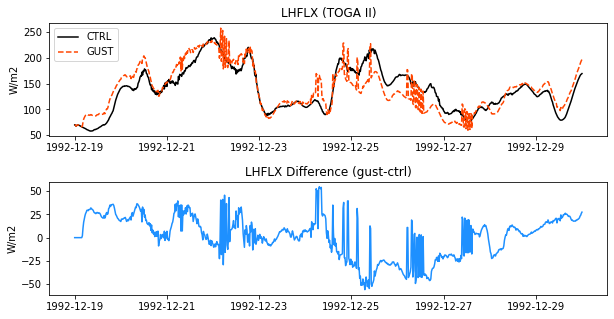

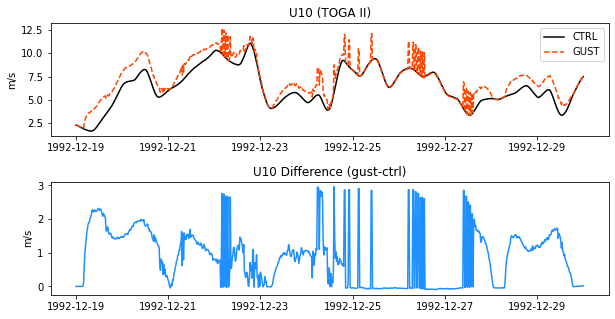

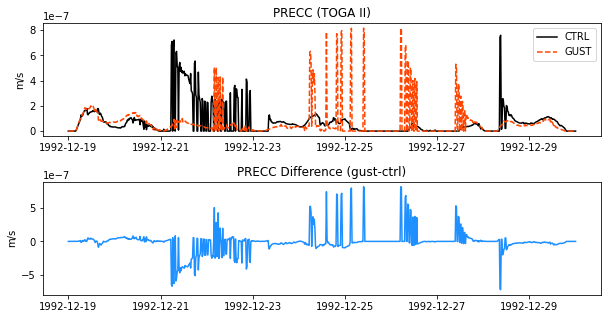

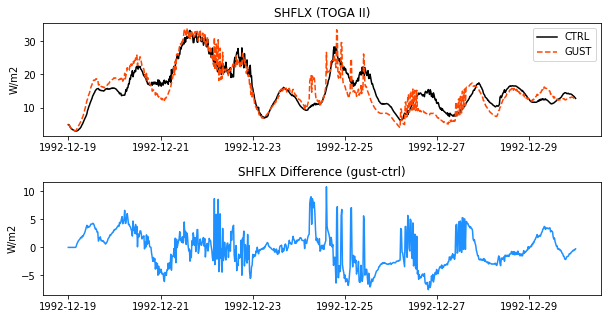

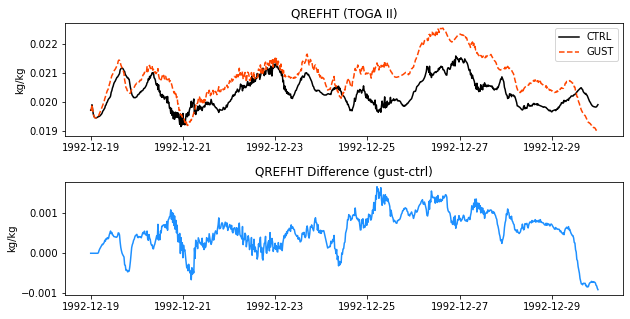

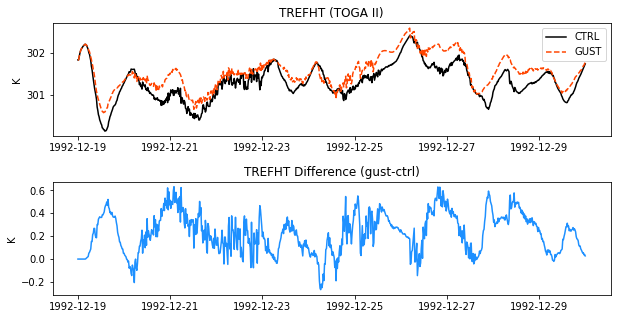

In [7]:

def lineplot_gust(var):
    fig,axs = plt.subplots(2,1, figsize=(10,5))
    axs = axs.ravel()
    axs[0].plot(ctrlDS.time, np.squeeze(ctrlDS[var].values), 'k', label='CTRL')
    axs[0].plot(gustDS.time, np.squeeze(gustDS[var].values), '--', color='orangered', label='GUST')
    axs[0].set_title(var+' (TOGA II)')
    axs[0].set_ylabel(ctrlDS[var].units) 
    axs[0].legend()
    
    axs[1].plot(gustDS.time, np.squeeze(gustDS[var].values - ctrlDS[var].values), '-', color='dodgerblue')
    axs[1].set_title(var+' Difference (gust-ctrl)')
    axs[1].set_ylabel(ctrlDS[var].units) 
    
    fig.subplots_adjust(hspace=0.4)
    
lineplot_gust('LHFLX')
lineplot_gust('U10')
lineplot_gust('PRECC')
lineplot_gust('SHFLX')
lineplot_gust('QREFHT')
lineplot_gust('TREFHT')
